In [70]:
import pandas as pd
import scipy 
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [2]:
titanic = pd.read_csv('./dataset/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Explicit indexes

#### .columns & .index

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [5]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

#### setting a column as the index

In [6]:
titanic_index = titanic.set_index('Name')
titanic_index.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### removing index

In [7]:
titanic_index.reset_index().head(3)

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
titanic_index.reset_index(drop=True).head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


## Visualizing your data

### Histogram

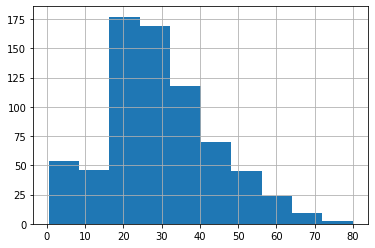

In [9]:
titanic['Age'].hist()
plt.show()

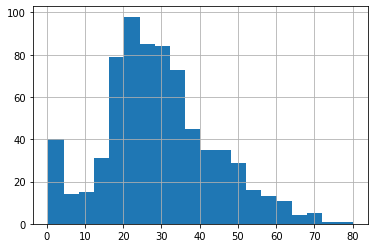

In [10]:
titanic['Age'].hist(bins=20)
plt.show()

<AxesSubplot:>

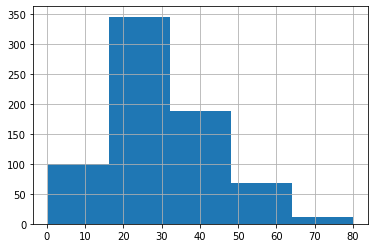

In [11]:
titanic['Age'].hist(bins=5)

### Bar plots

In [12]:
gender_count = titanic.groupby('Sex')['Age'].count()
gender_count

Sex
female    261
male      453
Name: Age, dtype: int64

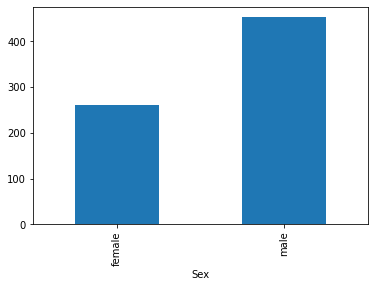

In [13]:
gender_count.plot(kind= 'bar')
plt.show()

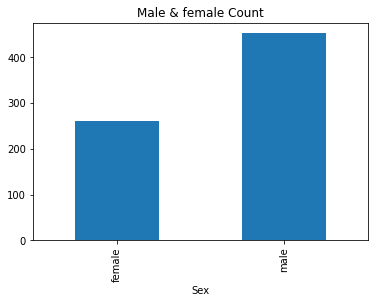

In [14]:
gender_count.plot(kind= 'bar', title= 'Male & female Count')
plt.show()

### Line plots

In [15]:
ten_ages = titanic.Age.iloc[7:15]
ten_ages

7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

<AxesSubplot:>

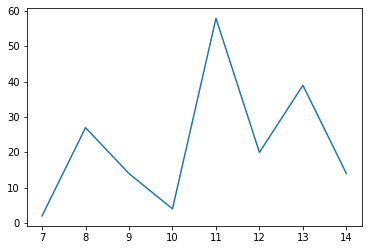

In [16]:
ten_ages.plot(x = ten_ages.index, y= ten_ages.values , kind= 'line') # < -- rotating x_labe

<AxesSubplot:>

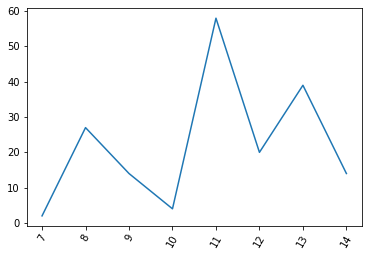

In [17]:
ten_ages.plot(x = ten_ages.index, y= ten_ages.values , kind= 'line', rot= 60)

### Scatter Plots

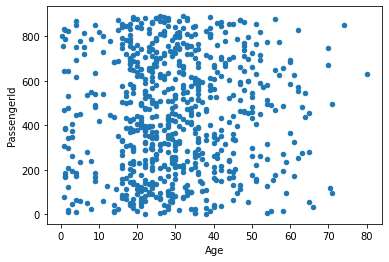

In [18]:
titanic.plot(x = 'Age', y= 'PassengerId' , kind= 'scatter')
plt.show()

### Layering plots

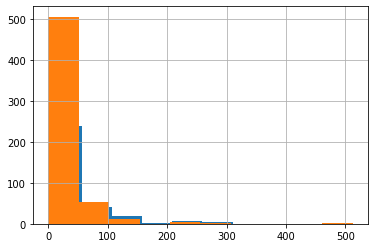

In [19]:
titanic[ titanic['Sex'] ==  "female"]['Fare'].hist() # < -- Blue Female
titanic[ titanic['Sex'] ==  "male"]['Fare'].hist() # <-- orange male
plt.show()

##### Add a legend

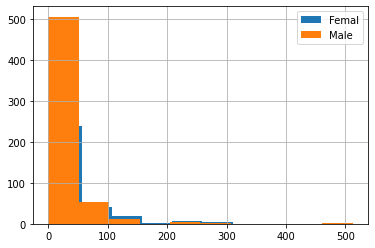

In [20]:
titanic[ titanic['Sex'] ==  "female"]['Fare'].hist()
titanic[ titanic['Sex'] ==  "male"]['Fare'].hist() 
plt.legend(['Femal', 'Male']) #adding legend to make it more clear
plt.show()

#### transparency

<AxesSubplot:>

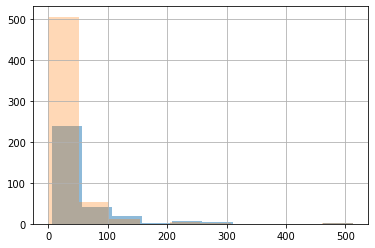

In [21]:
titanic[titanic['Sex'] == 'female']['Fare'].hist(alpha= 0.5) #<-- Blue
titanic[titanic['Sex'] == 'male']['Fare'].hist(alpha= 0.3)#<-- Orange

## Missing Values

In [22]:
titanic.shape

(891, 12)

In [23]:
titanic.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [24]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [25]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### ploting missing values

<AxesSubplot:>

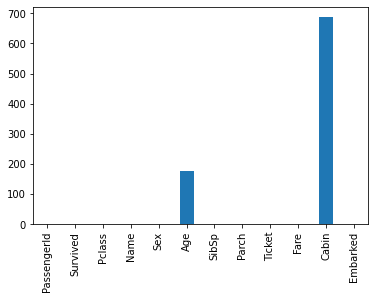

In [26]:
titanic.isna().sum().plot(kind='bar')

#### Removing missing values

In [27]:
titanic.dropna().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [28]:
titanic.dropna().shape #<--method1

(183, 12)

In [29]:
titanic.fillna(0).shape #<--method2

(891, 12)

## Creating DataFrame

<img src= './media/creating_dataframe.png'>

### list of Dictionaries - by row

In [30]:
list_of_dictionary = [
    {'name':'Ginger',
     'breed': 'lusi',
     'height_cm': 22,
     'weight_kgs':10 ,
     'date_of_birth':"2020-02-14"},
    
    { 'name': 'Scout',
     'breed': 'Dalmatian',
     'height_cm': 59,
     'weight_kgs':35 ,
     'date_of_birth':"2019-05-09"}
]

In [31]:
dogs = pd.DataFrame(list_of_dictionary)

In [32]:
dogs

,name,breed,height_cm,weight_kgs,date_of_birth
0,Ginger,lusi,22,10,2020-02-14
1,Scout,Dalmatian,59,35,2019-05-09


#### Dixtionary pf list -by column

In [33]:
dict_of_list = {
    'name': ['lusi', 'Scout'],
    'breed': ['Desi', 'farmi'],
    'weight_kg': [22,20]
}

In [34]:
dogs1 = pd.DataFrame(dict_of_list)

In [35]:
dogs1

,name,breed,weight_kg
0,lusi,Desi,22
1,Scout,farmi,20


## Reading & writing CSVs

<img src = './media/csv.png'>

#### CSV to DataFrame

In [36]:
dogs = pd.read_csv('./dogs.csv')
dogs

FileNotFoundError: [Errno 2] No such file or directory: './dogs.csv'

In [ ]:
dogs['new_column'] = True

In [ ]:
dogs

# DataFrame to CSV

In [ ]:
dogs.to_csv('new_dogs.csv')

# _______________Congradualtion do projects now____
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)

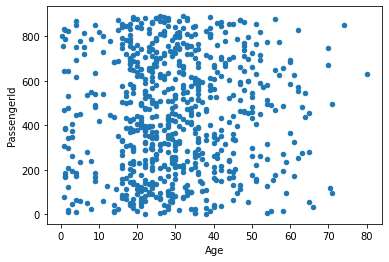

In [52]:
titanic.plot(x = 'Age', y= 'PassengerId' , kind= 'scatter')
plt.show()

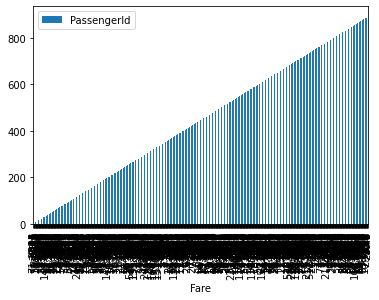

In [66]:
titanic.plot(x = 'Fare', y= 'PassengerId' , kind= 'bar')
plt.show()

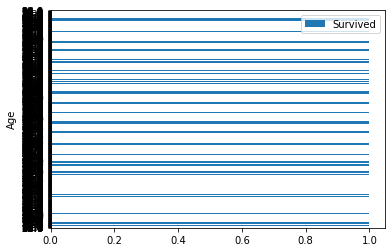

In [54]:
titanic.plot(x = 'Age', y= 'Survived' , kind= 'barh')
plt.show()

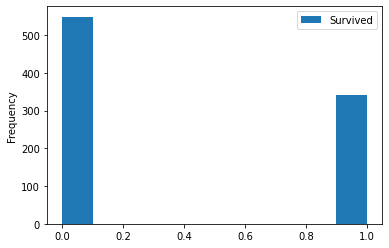

In [56]:
titanic.plot(x = 'Age', y= 'Survived', kind ='hist')
plt.show()

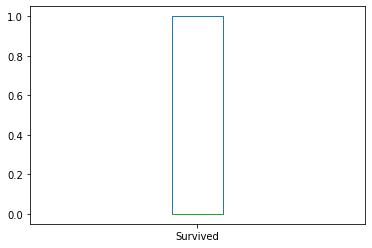

In [64]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'box')
plt.show()

ModuleNotFoundError: No module named 'scipy'

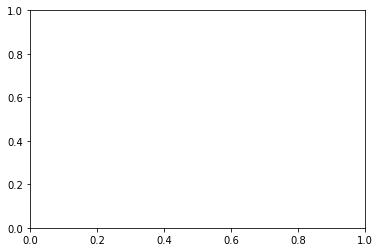

In [67]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'kde')
plt.show()
# It requires scipy i think !!

ModuleNotFoundError: No module named 'scipy'

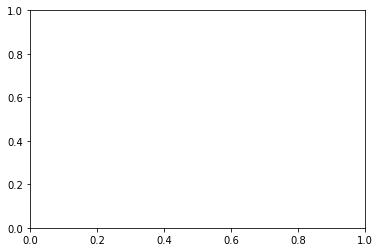

In [68]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'density')
plt.show()
# It requires scipy i think !!

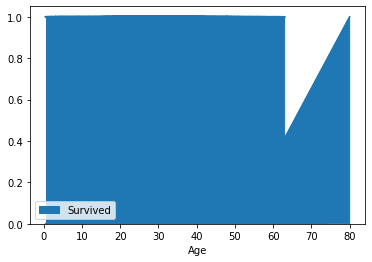

In [71]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'area')
plt.show()

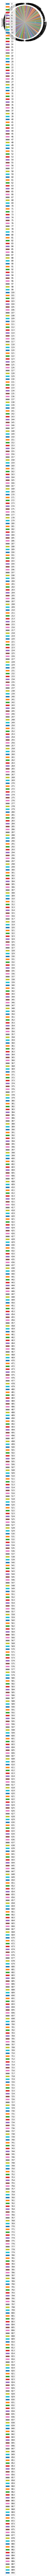

In [78]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'pie')
plt.show()

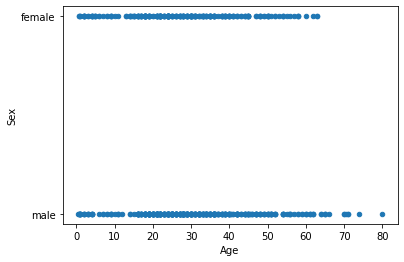

In [75]:
titanic.plot(x = 'Age', y= 'Sex', kind = 'scatter')
plt.show()

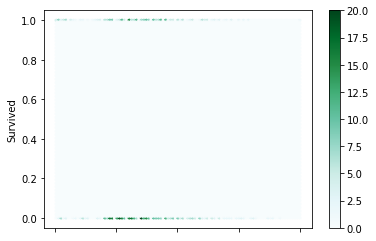

In [74]:
titanic.plot(x = 'Age', y= 'Survived', kind = 'hexbin')
plt.show()